I retrieved weather data for Seattle, WA from 2016 using the NOAA Climate Data Online tool. Generally, about 80% of the time spent in data analysis is cleaning and retrieving data, but this workload can be reduced by finding high-quality data sources. The NOAA tool is surprisingly easy to use and temperature data can be downloaded as clean csv files which can be parsed in languages such as Python or R.

year: 2016 for all data points<br>
month: number for month of the year<br>
day: number for day of the year<br>
week: day of the week as a character string<br>
temp_2: max temperature 2 days prior<br>
temp_1: max temperature 1 day prior<br>
average: historical average max temperature<br>
actual: max temperature measurement<br>
friend: your friend’s prediction, a random number between 20 below the average and 20 above the average

In [3]:
!pip install pydot

You should consider upgrading via the 'c:\users\anil\anaconda3\python.exe -m pip install --upgrade pip' command.


In [44]:
!pip install graphviz

You should consider upgrading via the 'c:\users\anil\anaconda3\python.exe -m pip install --upgrade pip' command.


In [34]:
from sklearn.tree import export_graphviz
import pydot

In [66]:
x_train.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("temps.csv")

In [3]:
data.shape

(348, 9)

In [20]:
data.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
year              348 non-null int64
month             348 non-null int64
day               348 non-null int64
week              348 non-null object
temp_2            348 non-null int64
temp_1            348 non-null int64
average           348 non-null float64
actual            348 non-null int64
forecast_noaa     348 non-null int64
forecast_acc      348 non-null int64
forecast_under    348 non-null int64
friend            348 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 32.7+ KB


In [10]:
data.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [11]:
list(data.columns)

['year',
 'month',
 'day',
 'week',
 'temp_2',
 'temp_1',
 'average',
 'actual',
 'forecast_noaa',
 'forecast_acc',
 'forecast_under',
 'friend']

In [12]:
data.week.value_counts()

Tues     52
Sat      50
Fri      50
Mon      49
Wed      49
Thurs    49
Sun      49
Name: week, dtype: int64

In [14]:
week_features = pd.get_dummies(data.week)

In [21]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data["week"] = lb.fit_transform(data["week"])

In [22]:
data.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,0,45,45,45.6,45,43,50,44,29
1,2016,1,2,2,44,45,45.7,44,41,50,44,61
2,2016,1,3,3,45,44,45.8,41,43,46,47,56
3,2016,1,4,1,44,41,45.9,40,44,48,46,53
4,2016,1,5,5,41,40,46.0,44,46,46,46,41


In [23]:
X = data.drop("actual",axis=1)
y = data["actual"]

In [24]:
X.head(2)

,year,month,day,week,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,0,45,45,45.6,43,50,44,29
1,2016,1,2,2,44,45,45.7,41,50,44,61


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=45)

In [63]:
x_train.shape

(261, 11)

In [64]:
x_test.shape

(87, 11)

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
y_pred = rf.predict(x_test)

In [30]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
202,80,75.5
112,59,62.0
20,52,51.5
4,44,44.3
194,72,73.2
10,45,51.0
63,53,59.8
122,68,61.3
176,79,74.7
319,49,49.5


In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_pred,y_test)

3.9195402298850577

In [33]:
mean_squared_error(y_pred,y_test)

25.499770114942535

In [36]:
list(X.columns)

['year',
 'month',
 'day',
 'week',
 'temp_2',
 'temp_1',
 'average',
 'forecast_noaa',
 'forecast_acc',
 'forecast_under',
 'friend']

In [52]:
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [68]:
rf.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=445591241, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1338705998, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1531910490, splitter='best'),
 DecisionTreeRegress

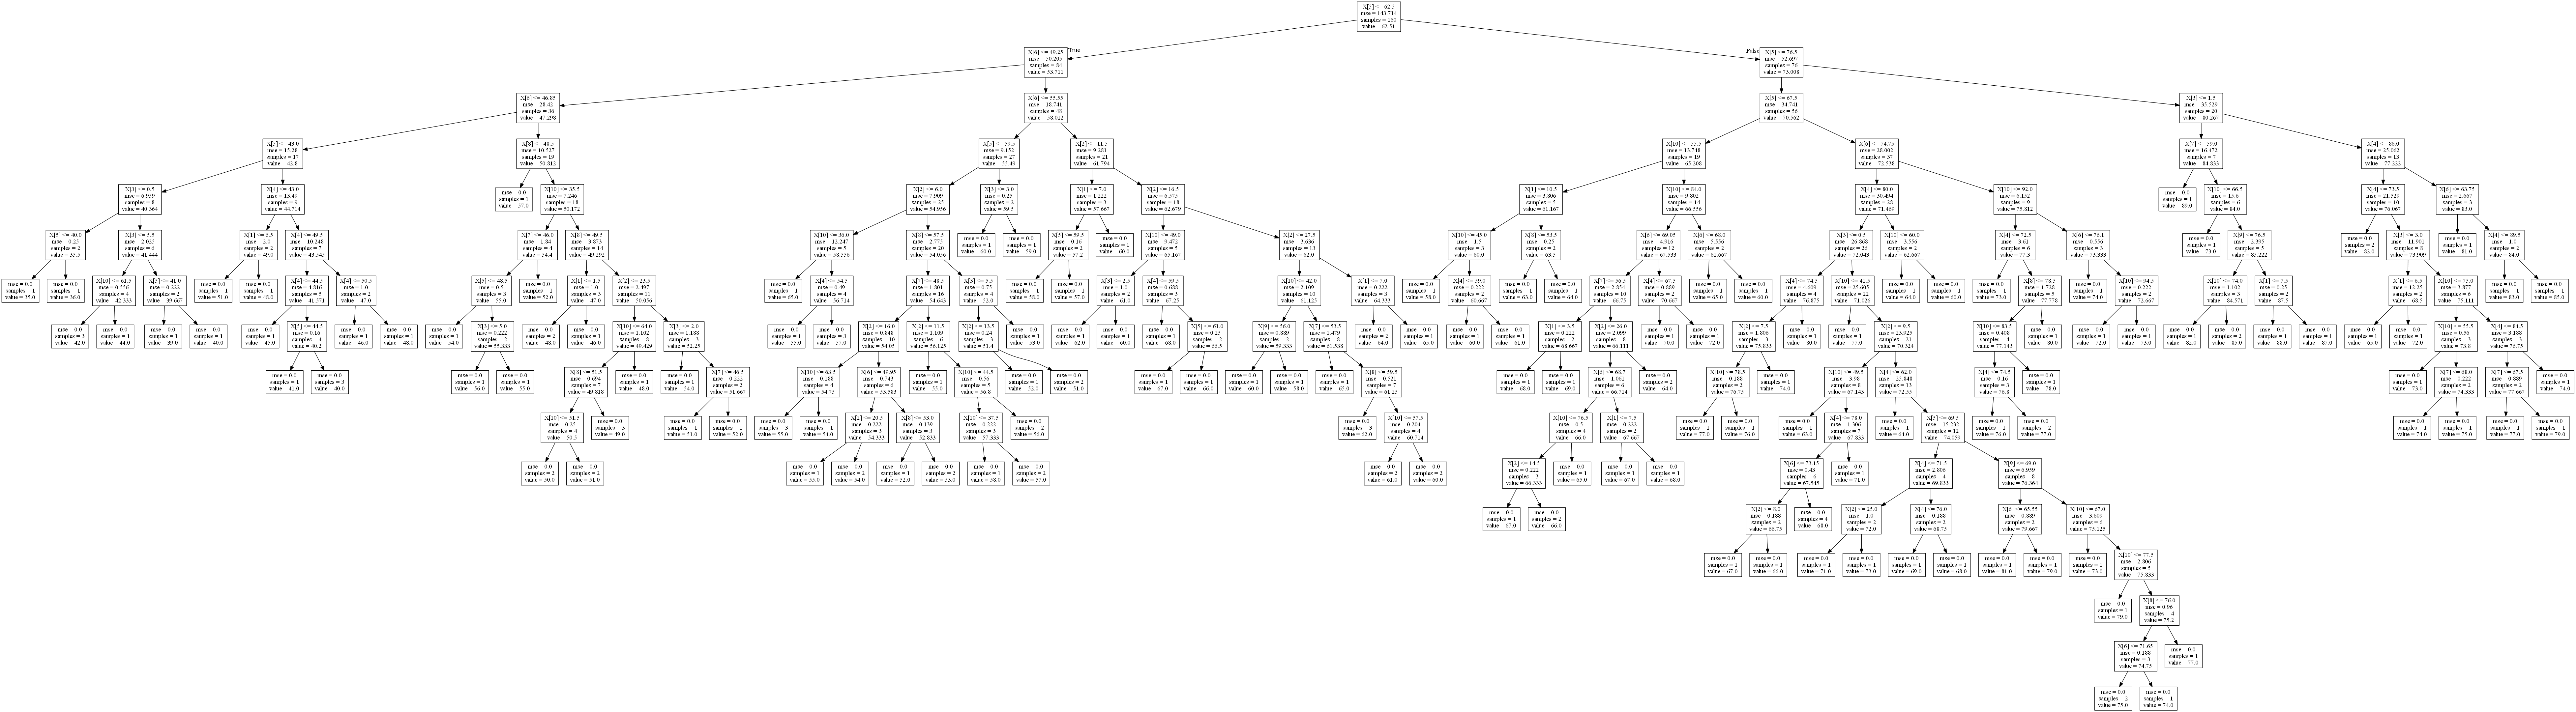

In [77]:
dot_data = StringIO()
export_graphviz(rf.estimators_[3], out_file=dot_data)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [72]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

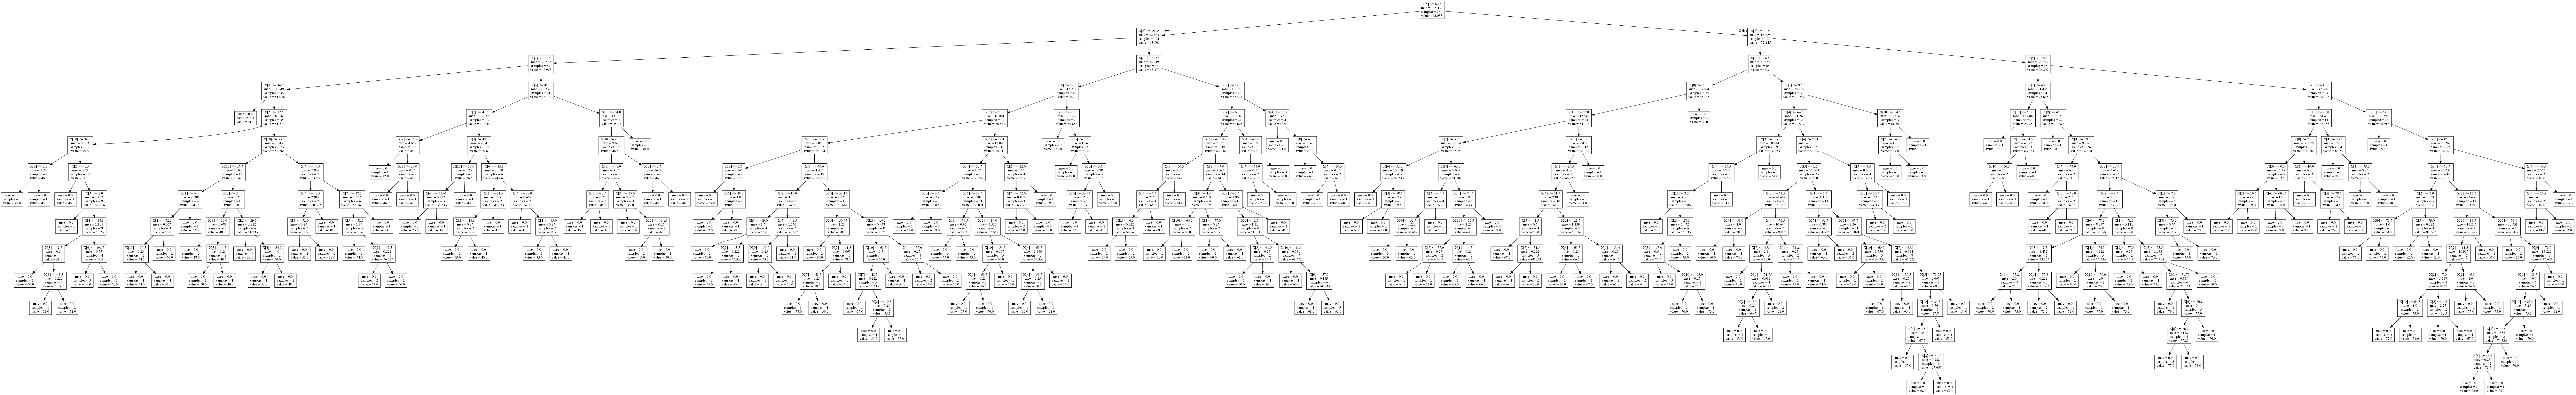

In [74]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())